# 3.3 È°û‰ººÊñáÁ´†Ê§úÁ¥¢„ÅÆ„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞

Êú¨„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„Åß„ÅØ„ÄÅJSTS„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÁî®„ÅÑ„Å¶„ÄÅÊñáÁ´†„ÅÆÈ°û‰ººÂ∫¶„ÇíË®àÁÆó„Åô„Çã„É¢„Éá„É´„Çí„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞„Åó„Åæ„Åô„ÄÇ

„É¢„Éá„É´„ÅÆË©ï‰æ°„ÅØ„ÄÅNotebook„Äå3-2_text_similarity_eval.ipynb„Äç„Çí„ÅîÁ¢∫Ë™ç„Åè„Å†„Åï„ÅÑ„ÄÇ

# ‰∫ãÂâçÊ∫ñÂÇô

„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅÆÊ∫ñÂÇô„Å®„Åó„Å¶„ÄÅ„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´„ÇÑ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô„Å™„Å©„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ

## (1)„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´

Âà©Áî®„Åô„Çã„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Çπ„Éà„Éº„É´„Åó„Åæ„Åô„ÄÇ

In [ ]:
! pip install datasets matplotlib japanize-matplotlib
! pip install fugashi unidic_lite
! pip install transformers
! pip install accelerate

## ‰π±Êï∞„Ç∑„Éº„Éâ„ÅÆË®≠ÂÆö

In [ ]:
from transformers.trainer_utils import set_seed

set_seed(2024)

## (2)„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô

### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆË™≠„ÅøËæº„Åø

In [ ]:
from datasets import load_dataset

# „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆË™≠„ÅøËæº„Åø
train_dataset = load_dataset(
    "shunk031/JGLUE", name="JSTS", split="train", trust_remote_code=True
    )

valid_dataset = load_dataset(
    "shunk031/JGLUE", name="JSTS", split="validation",trust_remote_code=True
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ¶ÇË¶Å„ÇíÁ¢∫Ë™ç

In [ ]:
# „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ¶ÇË¶Å„ÇíË°®Á§∫„Åô„Çã
print('Â≠¶Áøí„Éá„Éº„Çø')
print(train_dataset)

print()

print('Ë©ï‰æ°„Éá„Éº„Çø')
print(valid_dataset)

Â≠¶Áøí„Éá„Éº„Çø
Dataset({
    features: ['sentence_pair_id', 'yjcaptions_id', 'sentence1', 'sentence2', 'label'],
    num_rows: 12451
})

Ë©ï‰æ°„Éá„Éº„Çø
Dataset({
    features: ['sentence_pair_id', 'yjcaptions_id', 'sentence1', 'sentence2', 'label'],
    num_rows: 1457
})


### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ‰∏≠Ë∫´„ÇíÁ¢∫Ë™ç

In [ ]:
from pprint import pprint

# „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ‰∏≠Ë∫´„ÇíÁ¢∫Ë™ç„Åô„Çã
print("Â≠¶Áøí„Éá„Éº„Çø")
pprint(train_dataset[0])

print()

print("Ë©ï‰æ°„Éá„Éº„Çø")
pprint(valid_dataset[0])

Â≠¶Áøí„Éá„Éº„Çø
{'label': 0.0,
 'sentence1': 'Â∑ù„Åπ„Çä„Åß„Çµ„Éº„Éï„Éú„Éº„Éâ„ÇíÊåÅ„Å£„Åü‰∫∫„Åü„Å°„Åå„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence2': '„Éà„Ç§„É¨„ÅÆÂ£Å„Å´Èªí„ÅÑ„Çø„Ç™„É´„Åå„Åã„Åë„Çâ„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence_pair_id': '0',
 'yjcaptions_id': '10005_480798-10996-92616'}

Ë©ï‰æ°„Éá„Éº„Çø
{'label': 0.0,
 'sentence1': '„É¨„É≥„Ç¨„ÅÆÂª∫Áâ©„ÅÆÂâç„Çí„ÄÅ‰π≥ÊØçËªä„ÇíÊäº„Åó„ÅüÂ•≥ÊÄß„ÅåÊ≠©„ÅÑ„Å¶„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence2': 'Âé©Ëàé„ÅßÈ¶¨„Å®Â•≥ÊÄß„Å®„ÅåÂØÑ„ÇäÊ∑ª„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence_pair_id': '0',
 'yjcaptions_id': '100312_421853-104611-31624'}


## (3)„É¢„Éá„É´„ÅÆË™≠„ÅøËæº„Åø

È°û‰ººÂ∫¶„ÇíË®àÁÆó„Åô„ÇãÈöõ„Å´Âà©Áî®„Åô„Çã„É¢„Éá„É´„ÇíÊ∫ñÂÇô„Åó„Åæ„Åô„ÄÇ

In [ ]:
from transformers import AutoModelForSequenceClassification

# „É¢„Éá„É´„ÅÆË™≠„ÅøËæº„Åø
model = AutoModelForSequenceClassification.from_pretrained(
    "cl-tohoku/bert-base-japanese-v3",
    num_labels=1,
    problem_type="regression",
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## (4)„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÅÆÊ∫ñÂÇô

„ÉÜ„Ç≠„Çπ„Éà„Çí„Éà„Éº„ÇØ„É≥„Å´ÂàÜÂâ≤„Åô„Çã„Åü„ÇÅ„Å´„ÄÅ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÇíÊ∫ñÂÇô„Åó„Åæ„Åô„ÄÇ

In [ ]:
from transformers import AutoTokenizer

# „É¢„Éá„É´„Å´ÂØæÂøú„Åó„Åü„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÅÆË™≠„ÅøËæº„Åø
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-v3")

# „Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÅÆÁ®ÆÈ°û„ÅÆÁ¢∫Ë™ç
print(tokenizer)

BertJapaneseTokenizer(name_or_path='cl-tohoku/bert-base-japanese-v3', vocab_size=32768, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


### „Éà„Éº„ÇØ„É≥„Å´ÂàÜÂâ≤„Åó„ÄÅ„Éà„Éº„ÇØ„É≥ID„Çí‰ªò‰∏é

In [ ]:
from transformers import BatchEncoding

def tokenize_dataset(example: dict[str, str | int]) -> BatchEncoding:
    """Êñá„Éö„Ç¢„Çí„Éà„Éº„ÇØ„É≥Âåñ„Åó„ÄÅID„Å´Â§âÊèõ"""
    example_output = tokenizer(
        example["sentence1"], example["sentence2"], max_length=512
    )

    example_output["labels"] = example["label"]
    return example_output

# „Éà„Éº„ÇØ„É≥Âåñ„ÅÆÂÆüË°å
tokenized_train_datasets = train_dataset.map(
    tokenize_dataset,
    remove_columns=train_dataset.column_names,
)
tokenized_valid_datasets = valid_dataset.map(
    tokenize_dataset,
    remove_columns=valid_dataset.column_names,
)

Parameter 'function'=<function tokenize_dataset at 0x7dbff8b21b40> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/12451 [00:00<?, ? examples/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

### „Éü„Éã„Éê„ÉÉ„ÉÅÊßãÁØâ

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## (5)„Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç

È°û‰ººÂ∫¶ÊØé„ÅÆ‰ª∂Êï∞„ÇíÂèØË¶ñÂåñ„Åó„Å¶„Åø„Åæ„Åô„ÄÇ

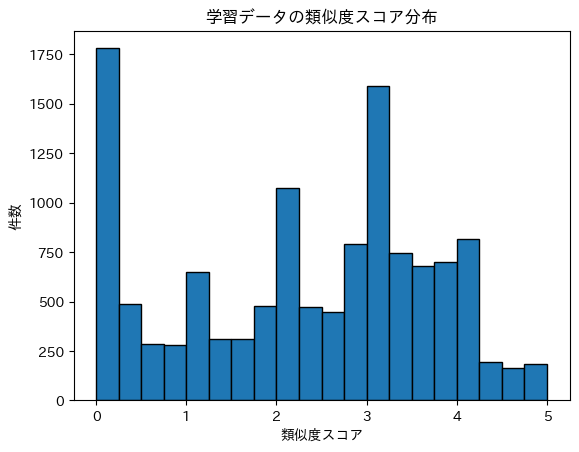

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

scores = []
for data in train_dataset:
    scores.append(data["label"])

plt.hist(scores,bins=20,histtype="bar", edgecolor="black")
plt.title('Â≠¶Áøí„Éá„Éº„Çø„ÅÆÈ°û‰ººÂ∫¶„Çπ„Ç≥„Ç¢ÂàÜÂ∏É')
plt.xlabel("È°û‰ººÂ∫¶„Çπ„Ç≥„Ç¢")
plt.ylabel("‰ª∂Êï∞")
plt.show()


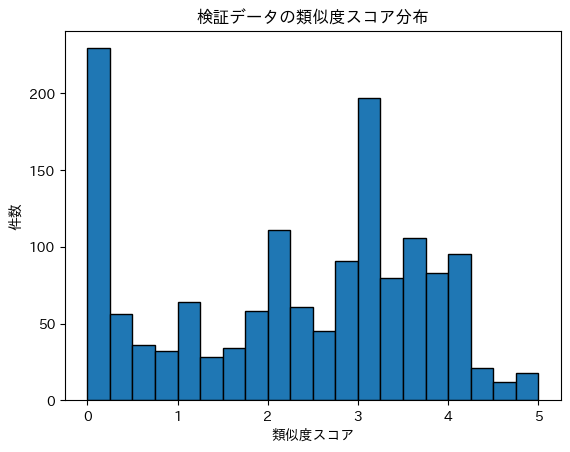

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

scores = []
for data in valid_dataset:
    scores.append(data["label"])

plt.hist(scores,bins=20,histtype="bar", edgecolor="black")
plt.title('Ê§úË®º„Éá„Éº„Çø„ÅÆÈ°û‰ººÂ∫¶„Çπ„Ç≥„Ç¢ÂàÜÂ∏É')
plt.xlabel("È°û‰ººÂ∫¶„Çπ„Ç≥„Ç¢")
plt.ylabel("‰ª∂Êï∞")
plt.show()


# „Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅÆÂÆüË£Ö

‰∫ãÂâçÊ∫ñÂÇô„Åå„Åß„Åç„Åü„ÅÆ„Åß„ÄÅ„É¢„Éá„É´„Çí„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞„Åó„Åæ„Åô„ÄÇ

## (1)Ë©ï‰æ°Èñ¢Êï∞„ÅÆÂÆöÁæ©

‰ª•‰∏ã„ÅÆÈñ¢Êï∞„Å´„Å¶„ÄÅÂ≠¶ÁøíÊôÇ„Å´Âà©Áî®„Åô„ÇãË©ï‰æ°ÊåáÊ®ô„ÅÆË®àÁÆó„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

def compute_metrics(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, float]:
    """‰∫àÊ∏¨„Çπ„Ç≥„Ç¢„Å®Ê≠£Ëß£„Çπ„Ç≥„Ç¢„ÇíÂÖ•Âäõ„Å®„Åó„Å¶„ÄÅ„Éî„Ç¢„ÇΩ„É≥„ÄÅ„Çπ„Éî„Ç¢„Éû„É≥„ÅÆÁõ∏Èñ¢‰øÇÊï∞„ÇíÁÆóÂá∫"""
    predictions, labels = eval_pred
    predictions = predictions.squeeze(1)
    return {
        "pearsonr": pearsonr(predictions, labels).statistic,
        "spearmanr": spearmanr(predictions, labels).statistic,
    }

## (2)Â≠¶ÁøíÊù°‰ª∂„ÅÆË®≠ÂÆö

Â≠¶Áøí„ÅÆÊù°‰ª∂„ÇíË®≠ÂÆö„Åô„Çã„Åü„ÇÅ„ÄÅ`TrainingArguments`„ÇØ„É©„Çπ„Å´ÂêÑÁ®ÆÊù°‰ª∂„ÇíÊåáÂÆö„Åó„Åæ„Åô„ÄÇ

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="output_jsts",  # ÁµêÊûú„ÅÆ‰øùÂ≠ò„Éï„Ç©„É´„ÉÄ
    num_train_epochs=3,  # Â≠¶Áøí„Ç®„Éù„ÉÉ„ÇØÊï∞
    learning_rate=2e-5,  # Â≠¶ÁøíÁéá
    lr_scheduler_type="linear",  # Â≠¶ÁøíÁéá„Çπ„Ç±„Ç∏„É•„Éº„É©„ÅÆÁ®ÆÈ°û
    warmup_ratio=0.1,  # Â≠¶ÁøíÁéá„ÅÆ„Ç¶„Ç©„Éº„É†„Ç¢„ÉÉ„Éó„ÅÆÈï∑„Åï„ÇíÊåáÂÆö
    per_device_train_batch_size=32,  # Â≠¶ÁøíÊôÇ„ÅÆ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
    per_device_eval_batch_size=32,  # Ë©ï‰æ°ÊôÇ„ÅÆ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
    save_strategy="epoch",  # „É¢„Éá„É´„ÅÆ‰øùÂ≠ò„Çø„Ç§„Éü„É≥„Ç∞
    logging_strategy="epoch",  # „É≠„Ç∞„ÅÆÂá∫Âäõ„Çø„Ç§„Éü„É≥„Ç∞
    evaluation_strategy="epoch",  # Ë©ï‰æ°„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞
    load_best_model_at_end=True,  # ÊúÄËâØ„ÅÆ„É¢„Éá„É´„ÇíÊúÄÂæå„Å´Ë™≠„ÅøËæº„ÇÄ„Åã„Å©„ÅÜ„Åã
    metric_for_best_model="spearmanr",  # ÊúÄËâØ„ÅÆ„É¢„Éá„É´„ÇíÂà§Êñ≠„Åô„ÇãÊåáÊ®ô
    fp16=True,  # Ëá™ÂãïÊ∑∑ÂêàÁ≤æÂ∫¶ÊºîÁÆó„ÅÆÊúâÂäπÂåñ
    overwrite_output_dir=True,  # Âá∫ÂäõÂÖà„ÅÆ„Éá„Ç£„É¨„ÇØ„Éà„É™„Çí‰∏äÊõ∏„Åç„Åô„Çã„Åã„Å©„ÅÜ„Åã
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


## (3)„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅÆÂÆüË°å

trainer.train() Èñ¢Êï∞„ÇíÂÆüË°å„Åó„Å¶„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÇíÈñãÂßã„Åó„Åæ„Åô„ÄÇ Google Colab „Åß T4 „ÅÆ GPU „ÇíÈÅ∏Êäû„Åó„ÅüÂ†¥Âêà„Å´„ÅØÁ¥Ñ3ÂàÜ„Åª„Å©ÊôÇÈñì„Åå„Åã„Åã„Çä„Åæ„Åô„ÄÇ

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,  # Âà©Áî®„Åô„Çã„É¢„Éá„É´
    args=training_args,  # Â≠¶ÁøíÊôÇ„ÅÆË®≠ÂÆö
    train_dataset=tokenized_train_datasets,  # Â≠¶Áøí„Éá„Éº„Çø
    eval_dataset=tokenized_valid_datasets,  # Ë©ï‰æ°„Éá„Éº„Çø
    data_collator=data_collator,  # „Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ
    compute_metrics=compute_metrics,  # Ë©ï‰æ°ÊåáÊ®ô„ÅÆË®àÁÆó
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:482: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [ ]:
trainer.train()

TrainOutput(global_step=1170, training_loss=0.5745594448513455, metrics={'train_runtime': 192.898, 'train_samples_per_second': 193.641, 'train_steps_per_second': 6.065, 'total_flos': 1013774752275654.0, 'train_loss': 0.5745594448513455, 'epoch': 3.0})

In [ ]:
# Ë©ï‰æ°ÊåáÊ®ô„ÅÆÁ¢∫Ë™ç
eval_metrics = trainer.evaluate(tokenized_valid_datasets)

pprint(eval_metrics)

{'epoch': 3.0,
 'eval_loss': 0.33865225315093994,
 'eval_pearsonr': 0.9139927234170125,
 'eval_runtime': 1.3297,
 'eval_samples_per_second': 1095.705,
 'eval_spearmanr': 0.8744820951335042,
 'eval_steps_per_second': 34.593}


## (4)„É¢„Éá„É´„ÅÆ‰øùÂ≠ò

Ê¨°„ÅÆ„Ç≥„Éº„Éâ„ÇíÂÆüË°å„Åó„Å¶„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞Ê∏à„Åø„ÅÆ„É¢„Éá„É´„Çí‰øùÂ≠ò„Åó„Åæ„Åô„ÄÇ

In [ ]:
# ‰øùÂ≠ò
trainer.save_state()  # Ë©ï‰æ°„Éá„Éº„Çø„ÅÆ„É°„Éà„É™„ÇØ„Çπ„ÅÆÊÉÖÂ†±„Çí‰øùÂ≠ò
trainer.save_model()  # „É¢„Éá„É´„ÅÆ‰øùÂ≠ò

# ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´‰øùÂ≠òÂÖà„ÇíÂºïÊï∞„Å®„Åó„Å¶ÊåáÂÆö„Åô„Çã„Åì„Å®„ÇÇÂèØËÉΩ„Åß„Åô„ÄÇ

# google drive„Å´‰øùÂ≠ò„Åô„Çã‰æã
# from google.colab import drive
# drive.mount("/content/drive")
# trainer.save_model("drive/MyDrive/output_jsts")

# ÂÆüË°åÁí∞Â¢É„Å´‰øùÂ≠ò„Åô„ÇãÂ†¥Âêà
# trainer.save_model("./output_jsts")